 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

# <center>  <b> Part - (1) : Understanding Basic Concepts </b>  </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a noisy sensor, where the noise follows a zero mean Gaussian with a variance of 20. Plot the scatter plot of the data.

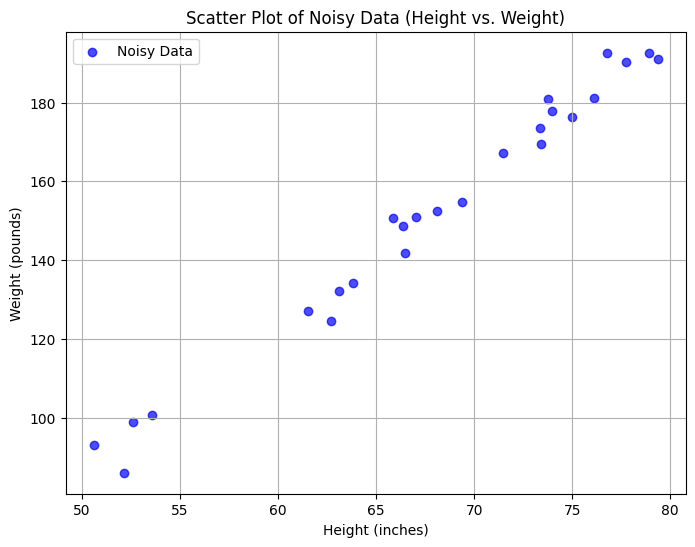

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(0)  # For reproducibility
num_points = 25
height_min = 50
height_max = 80
variance = 20

# Generate random heights within the given range
heights = np.random.uniform(height_min, height_max, num_points)

# Compute the corresponding weights using the given relationship
weights = 3.86 * heights - 110.42

# Add Gaussian noise with zero mean and the specified variance
noise = np.random.normal(0, np.sqrt(variance), num_points)
weights_noisy = weights + noise

# Scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(heights, weights_noisy, color='blue', label='Noisy Data', alpha=0.7)
plt.title('Scatter Plot of Noisy Data (Height vs. Weight)')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.grid(True)
plt.legend()
plt.show()


(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

Estimated w0: -102.62626262626263
Estimated w1: 3.754545454545455


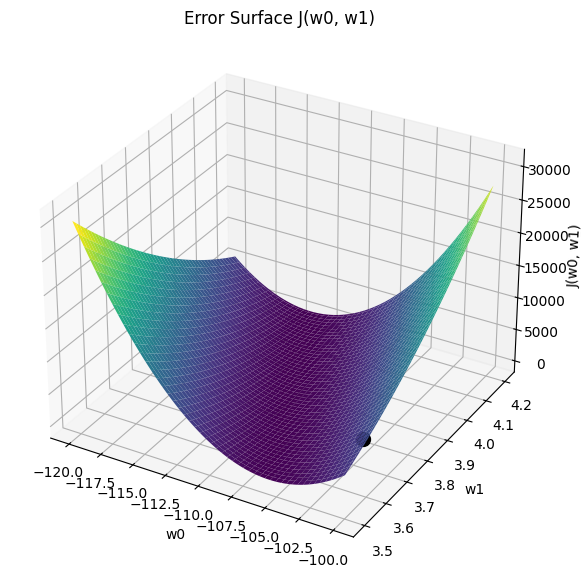

In [72]:
# Error surface J(w0, w1)
w0_range = np.linspace(-120, -100, 100)  # Range of w0 values
w1_range = np.linspace(3.5, 4.2, 100)   # Range of w1 values

J_surface = np.zeros((len(w0_range), len(w1_range)))

# Compute the error surface
for i, w0 in enumerate(w0_range):
    for j, w1 in enumerate(w1_range):
        J_surface[i, j] = np.sum((weights_noisy - (w0 + w1 * heights))**2)

# Locate the minimum
min_idx = np.unravel_index(np.argmin(J_surface), J_surface.shape)
optimal_w0 = w0_range[min_idx[0]]
optimal_w1 = w1_range[min_idx[1]]
print(f"Estimated w0: {optimal_w0}")
print(f"Estimated w1: {optimal_w1}")

# Plot the error surface
W0, W1 = np.meshgrid(w0_range, w1_range)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_surface, cmap='viridis')
ax.scatter(optimal_w0, optimal_w1, J_surface[min_idx], color='black', s=100, label='Minima')

# Labeling the plot
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('J(w0, w1)')
ax.set_title('Error Surface J(w0, w1)')

# Show the plot
plt.show()

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>


In [73]:
X = np.vstack((np.ones(num_points), heights)).T

# Vector of observed weights (noisy data)
t = weights_noisy

# Solve for w_opt using the least squares equation
w_opt = np.linalg.inv(X.T @ X) @ X.T @ t

# Extract the estimated parameters w0 and w1
w0_estimated, w1_estimated = w_opt

# Print the estimated parameters
print(f"Estimated w0: {w0_estimated}")
print(f"Estimated w1: {w1_estimated}")

# Compare with the desired true values
w0_true = -110.42
w1_true = 3.86

print(f"True w0: {w0_true}")
print(f"True w1: {w1_true}")

Estimated w0: -102.88505766705639
Estimated w1: 3.757550772438474
True w0: -110.42
True w1: 3.86


(d) <b> Report your observations </b>

1. The estimated parameters using the least squares method were very close to the true values, indicating that the method works well for this task.

2. The error surface clearly shows the relationship between $ w_{0} $
  and $ w_{1} $ , with the minimum indicating the optimal values.

3. Noise does affect the estimates, but the least squares approach provides a robust estimation of the parameters.



# **<b> Part - (2) : Understanding model order and overfitting  </b>**

(a) Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

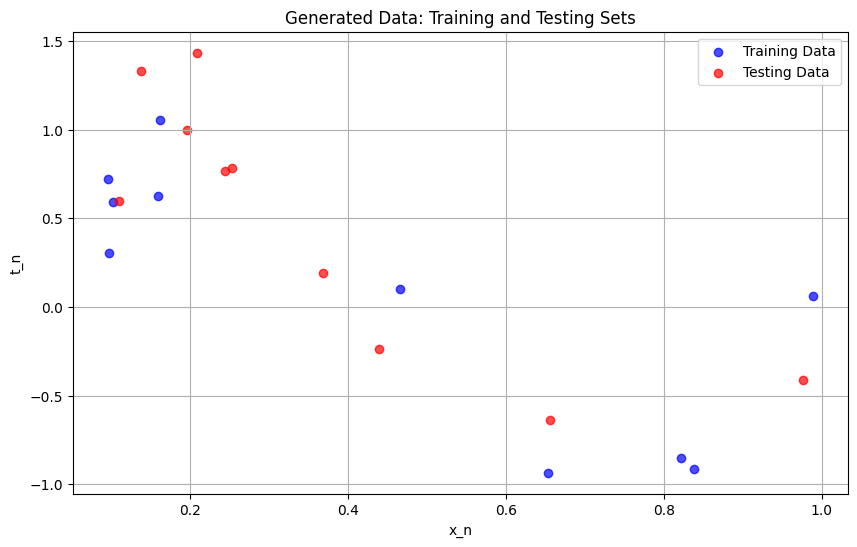

In [74]:
# Parameters
num_points = 20
train_size = 10
test_size = 10
noise_variance = 0.1

# Step 1: Generate random x_n values in the range [0, 1]
x_values = np.random.uniform(0, 1, num_points)

# Step 2: Compute t_n = sin(2*pi*x_n) + e_n, where e_n is Gaussian noise
noise = np.random.normal(0, np.sqrt(noise_variance), num_points)  # Gaussian noise with mean 0 and std deviation sqrt(0.1)
t_values = np.sin(2 * np.pi * x_values) + noise

# Step 3: Split the data into a training set and a testing set
# Randomly shuffle the indices
indices = np.random.permutation(num_points)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Training set
x_train = x_values[train_indices]
t_train = t_values[train_indices]

# Testing set
x_test = x_values[test_indices]
t_test = t_values[test_indices]

# Plotting the generated data points
plt.figure(figsize=(10, 6))
plt.scatter(x_train, t_train, color='blue', label='Training Data', alpha=0.7)
plt.scatter(x_test, t_test, color='red', label='Testing Data', alpha=0.7)
plt.title("Generated Data: Training and Testing Sets")
plt.xlabel('x_n')
plt.ylabel('t_n')
plt.legend()
plt.grid(True)
plt.show()

(b) Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

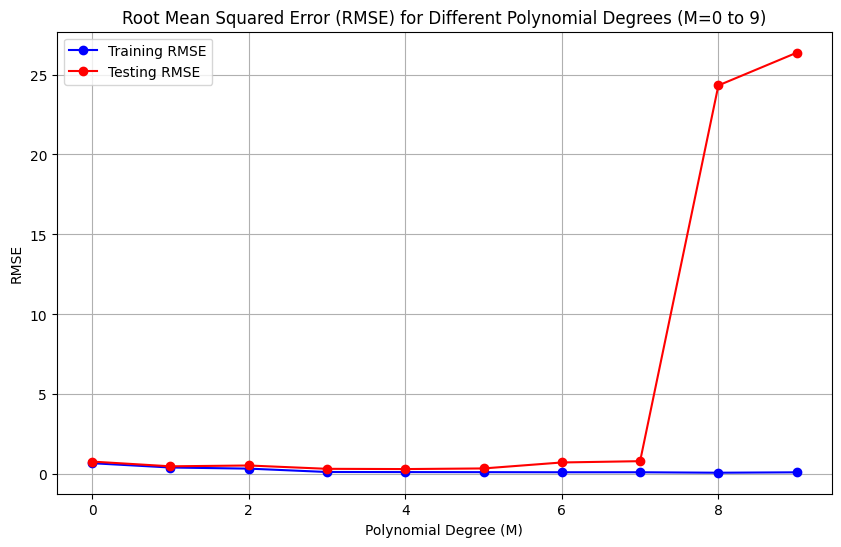

In [75]:
M_max = 9  # Maximum degree of polynomial (M = 0 to 9)

# Function to compute the root mean squared error (RMSE)
def compute_rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values)**2))

# Arrays to store RMSE for different polynomial degrees (0 to 9)
train_rmse = []
test_rmse = []

# Loop through polynomial degrees M = 0 to M_max
for M in range(M_max + 1):
    # Construct the design matrix X for the training set (polynomial features)
    X_train = np.vstack([x_train**m for m in range(M + 1)]).T
    X_test = np.vstack([x_test**m for m in range(M + 1)]).T

    # Solve for the optimal parameters using least squares: w_opt = (X^T X)^-1 X^T t
    w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ t_train

    # Predict the target values for training and testing sets
    t_train_pred = X_train @ w_opt
    t_test_pred = X_test @ w_opt

    # Compute RMSE for training and testing sets
    train_rmse.append(compute_rmse(t_train, t_train_pred))
    test_rmse.append(compute_rmse(t_test, t_test_pred))

# Plot the RMSE values for training and testing datasets
plt.figure(figsize=(10, 6))
plt.plot(range(M_max + 1), train_rmse, label='Training RMSE', marker='o', color='blue')
plt.plot(range(M_max + 1), test_rmse, label='Testing RMSE', marker='o', color='red')
plt.title('Root Mean Squared Error (RMSE) for Different Polynomial Degrees (M=0 to 9)')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

**Training RMSE:** As we increase the polynomial degree M, the model fits the training data better, leading to a decrease in the training RMSE. For very high degrees, the training error may approach zero, but this can lead to overfitting which can be seen by the simultaneous increase in the testing error.

**Testing RMSE:** The testing RMSE remains slightly higher than the training RMSE at the start, As the degree increases, the model will start overfitting the training data, leading to a drop in training RMSE but a rise in testing RMSE.


(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

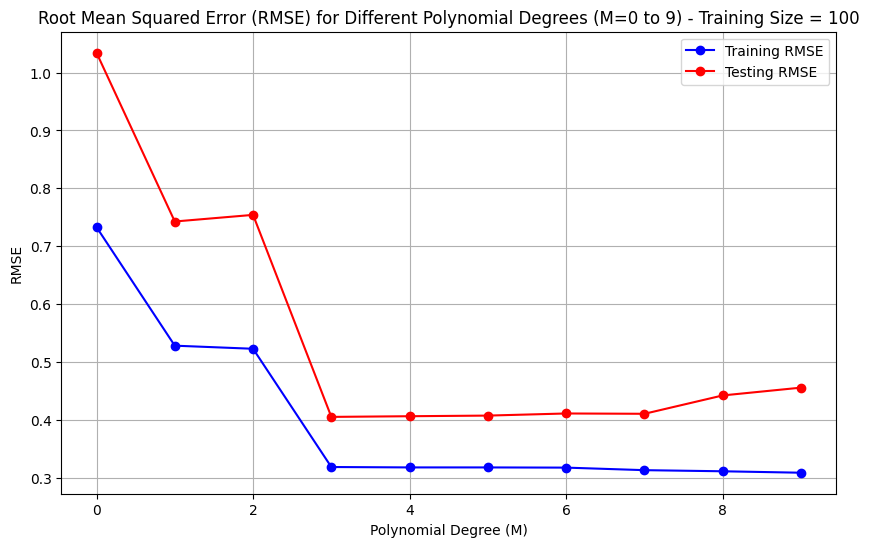

In [76]:
# Parameters
M_max = 9  # Maximum degree of polynomial (M = 0 to 9)
num_points_train = 100  # Increase the size of the training dataset
num_points_test = 10   # Testing dataset remains the same
noise_variance = 0.1

# Generate random x_n values in the range [0, 1] for training and testing
x_values = np.random.uniform(0, 1, num_points_train + num_points_test)
noise = np.random.normal(0, np.sqrt(noise_variance), num_points_train + num_points_test)
t_values = np.sin(2 * np.pi * x_values) + noise

# Split data into training and testing sets
indices = np.random.permutation(num_points_train + num_points_test)
train_indices = indices[:num_points_train]
test_indices = indices[num_points_train:]

x_train = x_values[train_indices]
t_train = t_values[train_indices]
x_test = x_values[test_indices]
t_test = t_values[test_indices]

# Function to compute the root mean squared error (RMSE)
def compute_rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values)**2))

# Arrays to store RMSE for different polynomial degrees (0 to 9)
train_rmse = []
test_rmse = []

# Loop through polynomial degrees M = 0 to M_max
for M in range(M_max + 1):
    # Construct the design matrix X for the training set (polynomial features)
    X_train = np.vstack([x_train**m for m in range(M + 1)]).T
    X_test = np.vstack([x_test**m for m in range(M + 1)]).T

    # Solve for the optimal parameters using least squares: w_opt = (X^T X)^-1 X^T t
    w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ t_train

    # Predict the target values for training and testing sets
    t_train_pred = X_train @ w_opt
    t_test_pred = X_test @ w_opt

    # Compute RMSE for training and testing sets
    train_rmse.append(compute_rmse(t_train, t_train_pred))
    test_rmse.append(compute_rmse(t_test, t_test_pred))

# Plot the RMSE values for training and testing datasets
plt.figure(figsize=(10, 6))
plt.plot(range(M_max + 1), train_rmse, label='Training RMSE', marker='o', color='blue')
plt.plot(range(M_max + 1), test_rmse, label='Testing RMSE', marker='o', color='red')
plt.title('Root Mean Squared Error (RMSE) for Different Polynomial Degrees (M=0 to 9) - Training Size = 100')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


**Training RMSE:**

 *  With more data, the polynomial model has a better fit on the training data, leading to a decrease in the RMSE as the polynomial degree increases.

**Testing RMSE:**

 *  For small degrees, the model may underfit, but as the polynomial degree increases, it will start capturing more of the underlying data pattern. After reaching a certain degree, the model might begin overfitting, resulting in higher RMSE values for the testing set.

**Comparison to Part (b):**

* Increasing the training dataset size improved the overall performance of the model, especially on the testing set. With more data, the model has better generalization, so we see the RMSE for the testing set to be less sensitive to the polynomial degree compared to when the training set was smaller.

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

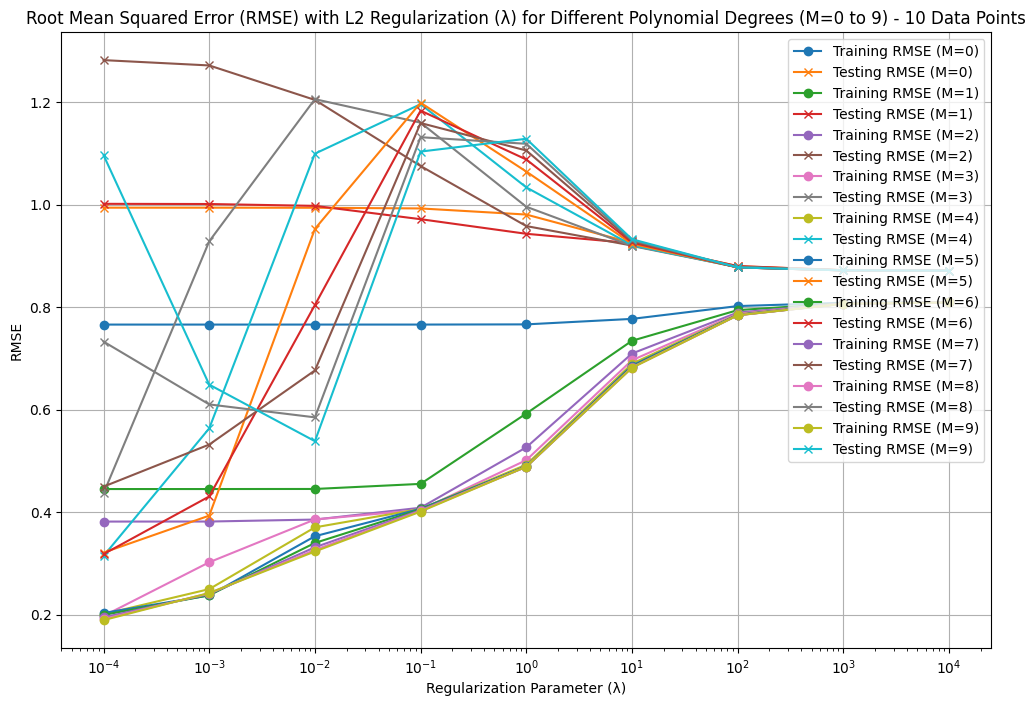

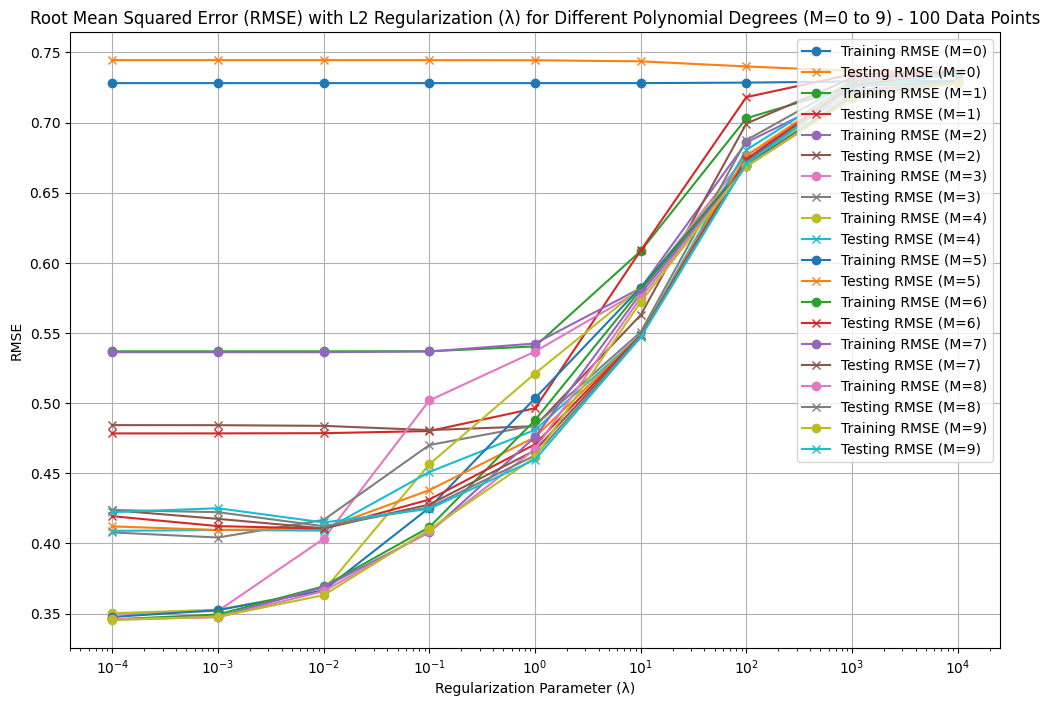

In [77]:
# Function to perform Ridge Regression (L2 Regularization)
def ridge_regression(X, t, lambda_val):
    I = np.eye(X.shape[1])  # Identity matrix for regularization
    w_opt = np.linalg.inv(X.T @ X + lambda_val * I) @ X.T @ t
    return w_opt

# Function to compute the root mean squared error (RMSE)
def compute_rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values)**2))

# Part (b) - Using 10 Data Points
num_points_train = 10  # Training dataset size = 10
num_points_test = 10   # Testing dataset size = 10
noise_variance = 0.1

# Generate random x_n values in the range [0, 1] for training and testing
x_values = np.random.uniform(0, 1, num_points_train + num_points_test)
noise = np.random.normal(0, np.sqrt(noise_variance), num_points_train + num_points_test)
t_values = np.sin(2 * np.pi * x_values) + noise

# Split data into training and testing sets
indices = np.random.permutation(num_points_train + num_points_test)
train_indices = indices[:num_points_train]
test_indices = indices[num_points_train:]

x_train = x_values[train_indices]
t_train = t_values[train_indices]
x_test = x_values[test_indices]
t_test = t_values[test_indices]

# Arrays to store RMSE for different polynomial degrees (0 to 9) and regularization strengths (λ)
train_rmse_lambda = []
test_rmse_lambda = []

# Range of λ values to study the effect of regularization
lambda_values = np.logspace(-4, 4, 9)  # Log scale range from 10^-4 to 10^4

# Loop through polynomial degrees M = 0 to M_max and regularization strengths λ
M_max = 9  # Maximum degree of polynomial (M = 0 to 9)
for M in range(M_max + 1):
    train_rmse_lambda_values = []
    test_rmse_lambda_values = []

    for lambda_val in lambda_values:
        # Construct the design matrix X for the training set (polynomial features)
        X_train = np.vstack([x_train**m for m in range(M + 1)]).T
        X_test = np.vstack([x_test**m for m in range(M + 1)]).T

        # Apply Ridge Regression (L2 Regularization)
        w_opt = ridge_regression(X_train, t_train, lambda_val)

        # Predict the target values for training and testing sets
        t_train_pred = X_train @ w_opt
        t_test_pred = X_test @ w_opt

        # Compute RMSE for training and testing sets for this λ
        train_rmse_lambda_values.append(compute_rmse(t_train, t_train_pred))
        test_rmse_lambda_values.append(compute_rmse(t_test, t_test_pred))

    train_rmse_lambda.append(train_rmse_lambda_values)
    test_rmse_lambda.append(test_rmse_lambda_values)

# Plot the RMSE values for training and testing datasets for different λ values
plt.figure(figsize=(12, 8))
for i, M in enumerate(range(M_max + 1)):
    plt.plot(lambda_values, train_rmse_lambda[i], label=f'Training RMSE (M={M})', marker='o')
    plt.plot(lambda_values, test_rmse_lambda[i], label=f'Testing RMSE (M={M})', marker='x')

plt.xscale('log')  # Use a logarithmic scale for λ
plt.title('Root Mean Squared Error (RMSE) with L2 Regularization (λ) for Different Polynomial Degrees (M=0 to 9) - 10 Data Points')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Part (c) - Using 100 Data Points
num_points_train = 100  # Training dataset size = 100
num_points_test = 10   # Testing dataset size = 10 remains unchanged

# Generate random x_n values for training and testing
x_values = np.random.uniform(0, 1, num_points_train + num_points_test)
noise = np.random.normal(0, np.sqrt(noise_variance), num_points_train + num_points_test)
t_values = np.sin(2 * np.pi * x_values) + noise

# Split data into training and testing sets
indices = np.random.permutation(num_points_train + num_points_test)
train_indices = indices[:num_points_train]
test_indices = indices[num_points_train:]

x_train = x_values[train_indices]
t_train = t_values[train_indices]
x_test = x_values[test_indices]
t_test = t_values[test_indices]

# Arrays to store RMSE for different polynomial degrees (0 to 9) and regularization strengths (λ)
train_rmse_lambda = []
test_rmse_lambda = []

# Loop through polynomial degrees M = 0 to M_max and regularization strengths λ
for M in range(M_max + 1):
    train_rmse_lambda_values = []
    test_rmse_lambda_values = []

    for lambda_val in lambda_values:
        # Construct the design matrix X for the training set (polynomial features)
        X_train = np.vstack([x_train**m for m in range(M + 1)]).T
        X_test = np.vstack([x_test**m for m in range(M + 1)]).T

        # Apply Ridge Regression (L2 Regularization)
        w_opt = ridge_regression(X_train, t_train, lambda_val)

        # Predict the target values for training and testing sets
        t_train_pred = X_train @ w_opt
        t_test_pred = X_test @ w_opt

        # Compute RMSE for training and testing sets for this λ
        train_rmse_lambda_values.append(compute_rmse(t_train, t_train_pred))
        test_rmse_lambda_values.append(compute_rmse(t_test, t_test_pred))

    train_rmse_lambda.append(train_rmse_lambda_values)
    test_rmse_lambda.append(test_rmse_lambda_values)

# Plot the RMSE values for training and testing datasets for different λ values
plt.figure(figsize=(12, 8))
for i, M in enumerate(range(M_max + 1)):
    plt.plot(lambda_values, train_rmse_lambda[i], label=f'Training RMSE (M={M})', marker='o')
    plt.plot(lambda_values, test_rmse_lambda[i], label=f'Testing RMSE (M={M})', marker='x')

plt.xscale('log')  # Use a logarithmic scale for λ
plt.title('Root Mean Squared Error (RMSE) with L2 Regularization (λ) for Different Polynomial Degrees (M=0 to 9) - 100 Data Points')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


* When regularization parameter is small it seems to not have any effect on the RMSE
* when it is in the order of 0.1, for all the model of different M they seem to have very similar RMSE which implies the regularization has worked as it is succesfully countering overfitting.
* When the value of the regularization parameter increases and is in the order of 100, all the the RMSE errors are still close by but they are all approaching the error value when model order is 0. Which means that due to the regularization term the weight vector is very close to zero and hence for all the different model orders they are underfitting.

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

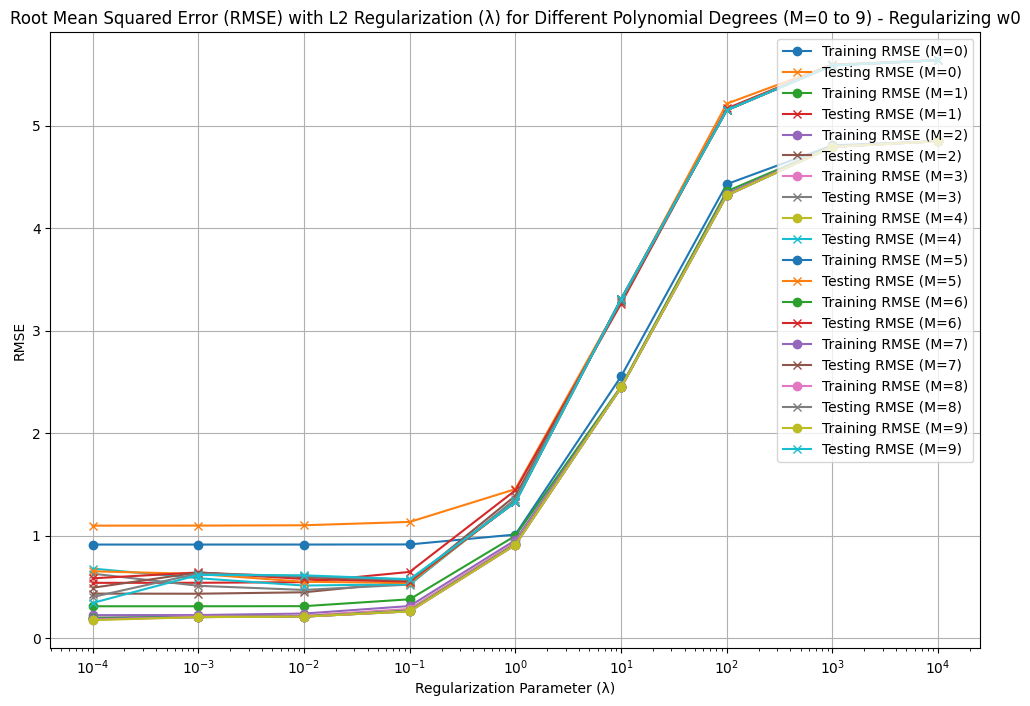

In [78]:
# Generate Data with the new form tn = 5 + sin(2πxn) + en
num_points_train = 10  # Training dataset size = 10
num_points_test = 10   # Testing dataset size = 10
noise_variance = 0.1

# Generate random x_n values in the range [0, 1] for training and testing
x_values = np.random.uniform(0, 1, num_points_train + num_points_test)
noise = np.random.normal(0, np.sqrt(noise_variance), num_points_train + num_points_test)

# The new function tn = 5 + sin(2πxn) + en
t_values = 5 + np.sin(2 * np.pi * x_values) + noise

# Split data into training and testing sets
indices = np.random.permutation(num_points_train + num_points_test)
train_indices = indices[:num_points_train]
test_indices = indices[num_points_train:]

x_train = x_values[train_indices]
t_train = t_values[train_indices]
x_test = x_values[test_indices]
t_test = t_values[test_indices]

# Arrays to store RMSE for different polynomial degrees (0 to 9) and regularization strengths (λ)
train_rmse_lambda = []
test_rmse_lambda = []

# Range of λ values to study the effect of regularization
lambda_values = np.logspace(-4, 4, 9)  # Log scale range from 10^-4 to 10^4

# Loop through polynomial degrees M = 0 to M_max and regularization strengths λ
M_max = 9  # Maximum degree of polynomial (M = 0 to 9)
for M in range(M_max + 1):
    train_rmse_lambda_values = []
    test_rmse_lambda_values = []

    for lambda_val in lambda_values:
        # Construct the design matrix X for the training set (polynomial features)
        X_train = np.vstack([x_train**m for m in range(M + 1)]).T
        X_test = np.vstack([x_test**m for m in range(M + 1)]).T

        # Apply Ridge Regression (L2 Regularization)
        w_opt = ridge_regression(X_train, t_train, lambda_val)

        # Predict the target values for training and testing sets
        t_train_pred = X_train @ w_opt
        t_test_pred = X_test @ w_opt

        # Compute RMSE for training and testing sets for this λ
        train_rmse_lambda_values.append(compute_rmse(t_train, t_train_pred))
        test_rmse_lambda_values.append(compute_rmse(t_test, t_test_pred))

    train_rmse_lambda.append(train_rmse_lambda_values)
    test_rmse_lambda.append(test_rmse_lambda_values)

# Plot the RMSE values for training and testing datasets for different λ values
plt.figure(figsize=(12, 8))
for i, M in enumerate(range(M_max + 1)):
    plt.plot(lambda_values, train_rmse_lambda[i], label=f'Training RMSE (M={M})', marker='o')
    plt.plot(lambda_values, test_rmse_lambda[i], label=f'Testing RMSE (M={M})', marker='x')

plt.xscale('log')  # Use a logarithmic scale for λ
plt.title('Root Mean Squared Error (RMSE) with L2 Regularization (λ) for Different Polynomial Degrees (M=0 to 9) - Regularizing w0')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


* Similar to our earlier observation when the regulariztion parameter is of the order 100 it forces the bias parameter to 0 and hence the RMSE error peaks and is equal to 5 as our target also has the bias term as 5. ($t_{n}=5+sin(2πx_{n})+e_{n}$)

<b>Report your observations</b>

1. **Training RMSE vs. Polynomial Degree (M)**:
   - As the polynomial degree \( M \) increases, the **training RMSE** decreases because the model fits the training data more closely.
   - For very high degrees, the training RMSE can approach zero, but **overfitting** occurs, leading to poor generalization and an increase in **testing RMSE**.

2. **Testing RMSE**:
   - Initially, the testing RMSE is slightly higher than the training RMSE. As \( M \) increases, the model begins to overfit the training data, causing the training RMSE to drop but the testing RMSE to rise.

3. **Effect of Larger Training Set**:
   - Increasing the training data size to 100 points improves the model's performance and generalization, leading to less sensitivity of the testing RMSE to changes in polynomial degree.

4. **Regularization Impact**:
   - With a small regularization parameter , the regularization term reduces overfitting, making the RMSE values across different polynomial degrees similar.
   - For a large regularization parameter , the model begins to **underfit** as the weights, including the bias term, are pushed towards zero. This results in a higher RMSE, approaching the error when the model order is 0 (i.e., a constant model).

5. **Bias Term Regularization**:
   - When the target function is modified to include a bias term($t_{n}=5+sin(2πx_{n})+e_{n}$), regularizing the bias term $ w_0 $ forces it towards zero, causing the model to underfit and resulting in a peak in RMSE due to the model biasing to zero.


# <b> Part - (3) : Understanding the choice of kernel  </b>

(a) Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M



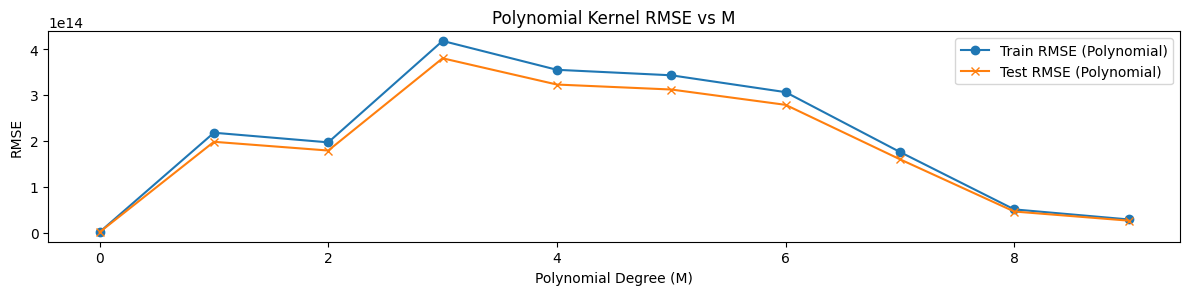

In [79]:
#########################################
#Generate 100 data points
########################################

def generate_data(n=100):
    x_values = np.random.uniform(0, 1, n)
    noise = np.random.normal(0, np.sqrt(0.1), n)
    t_values = np.sin(2 * np.pi * x_values) + noise  # Target function: sin(2πx) + noise
    return x_values, t_values

#########################################
#Obtian train and test splits
#Take even samples for training and odd samples for testing
########################################

def train_test_split(x_values, t_values):
    # Use even indices for training, odd indices for testing
    train_indices = np.arange(0, len(x_values), 2)
    test_indices = np.arange(1, len(x_values), 2)

    x_train = x_values[train_indices]
    t_train = t_values[train_indices]
    x_test = x_values[test_indices]
    t_test = t_values[test_indices]

    return x_train, t_train, x_test, t_test

#########################################
#Function to estimate the parameters
#Kernel Regression fit
########################################

def KernelRegressionFit1(X_train, Y_train, kernelType, M, lamda=0.1):
    """
    Function to fit the kernel regression model and estimate the weights.

    Parameters:
    X_train : array of training data points
    Y_train : array of training target values
    kernelType : {polynomial, gaussian, sigmoidal}
    M : degree of polynomial kernel or parameter for kernel functions
    lamda : regularization parameter

    Returns:
    w_opt : estimated weights for kernel regression
    """
    N = len(X_train)
    X = np.zeros((N, N))

    # Kernel transformation based on kernel type
    if kernelType == 'polynomial':
        for i in range(N):
            for j in range(N):
                X[i, j] = (X_train[i] * X_train[j] + 1) ** M

    # Regularization: XTX + lamda * I
    XTX = np.dot(X.T, X) + lamda * np.eye(N)

    # Compute the optimal weights (w_opt)
    w_opt = np.linalg.solve(XTX, np.dot(X.T, Y_train))

    return w_opt

#########################################
#Function to compute the training and testing errors from the current weight estimates
########################################

def KernelRegressionPred_Error1(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    """
    Function to compute training and testing errors for the kernel regression model.

    Parameters:
    w_est : estimated weights from kernel regression
    X_train : training data points
    Y_train : true training targets
    X_test : testing data points
    Y_test : true testing targets
    kernelType : kernel type used in model {'polynomial', 'gaussian', 'sigmoidal'}

    Returns:
    TrainError : training error (RMSE)
    TestError : testing error (RMSE)
    """
    N_train = len(X_train)
    N_test = len(X_test)

    # Kernel transformation based on kernel type
    if kernelType == 'polynomial':
        K_train = np.array([[((X_train[i] * X_train[j] + 1) ** len(w_est)) for j in range(N_train)] for i in range(N_train)])
        K_test = np.array([[((X_test[i] * X_train[j] + 1) ** len(w_est)) for j in range(N_train)] for i in range(N_test)])

    # Training predictions
    Y_train_pred = np.dot(K_train, w_est)
    # Testing predictions
    Y_test_pred = np.dot(K_test, w_est)

    # Compute RMSE (Root Mean Squared Error) for training and testing errors
    TrainError = np.sqrt(np.mean((Y_train - Y_train_pred) ** 2))
    TestError = np.sqrt(np.mean((Y_test - Y_test_pred) ** 2))

    return TrainError, TestError

#########################################
#Iterate through range of M values
#Train and test models using polynomial, gaussian, sigmoidal kernels
########################################

# Generate data
x_values, t_values = generate_data()
x_train, t_train, x_test, t_test = train_test_split(x_values, t_values)

M_range = list(range(10))  # Polynomial degrees

# Store errors
polynomial_tr_error = []
polynomial_te_error = []

for M in M_range:
    # Fit the model for Polynomial Kernel
    w_poly = KernelRegressionFit1(x_train, t_train, 'polynomial', M, lamda=0.1)
    tr_err_poly, te_err_poly = KernelRegressionPred_Error1(w_poly, x_train, t_train, x_test, t_test, 'polynomial')
    polynomial_tr_error.append(tr_err_poly)
    polynomial_te_error.append(te_err_poly)


# Plot the training and testing errors for all kernels and model orders M
plt.figure(figsize=(12, 8))

# Polynomial Kernel Errors
plt.subplot(3, 1, 1)
plt.plot(M_range, polynomial_tr_error, label='Train RMSE (Polynomial)', marker='o')
plt.plot(M_range, polynomial_te_error, label='Test RMSE (Polynomial)', marker='x')
plt.title('Polynomial Kernel RMSE vs M')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


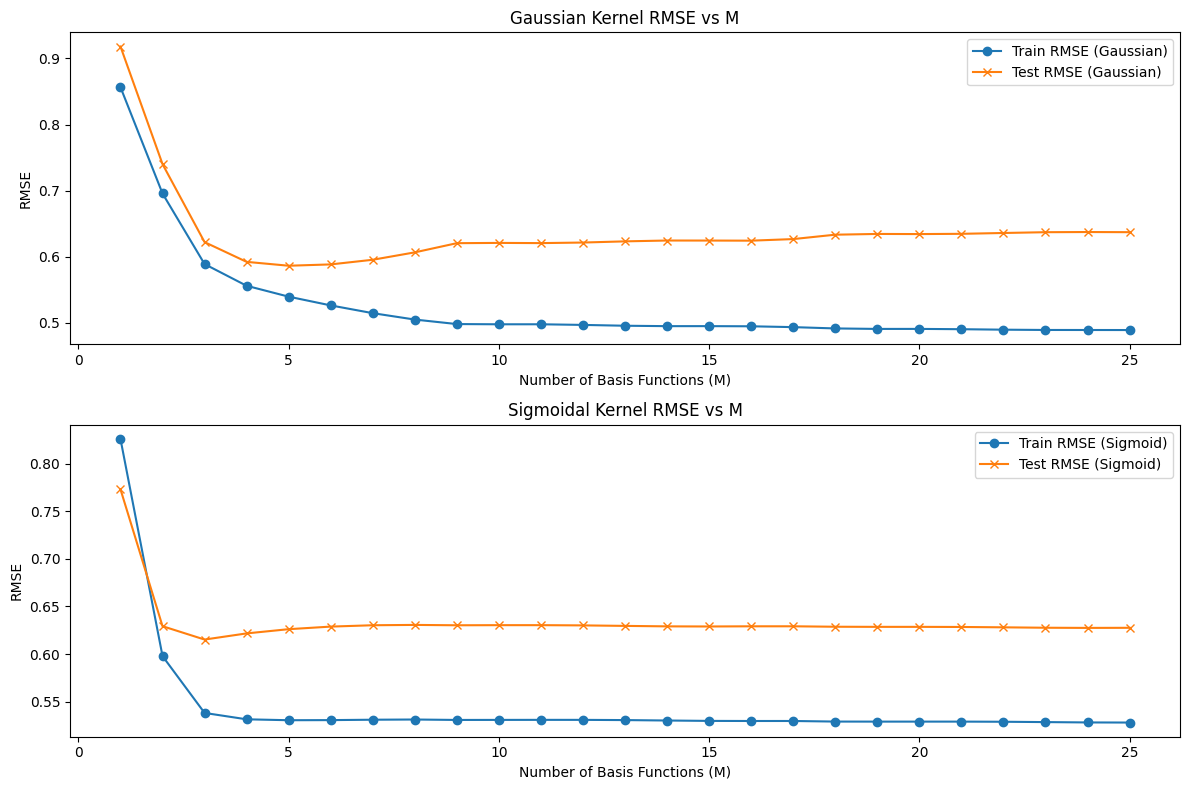

In [80]:
# Generate 100 data points
def generate_data(n=100):
    x_values = np.random.uniform(0, 1, n)
    noise = np.random.normal(0, np.sqrt(0.1), n)
    t_values = np.sin(2 * np.pi * x_values) + noise  # Target function: sin(2πx) + noise
    return x_values, t_values

# Split data into training and testing sets
def train_test_split(x_values, t_values):
    # Use even indices for training, odd indices for testing
    train_indices = np.arange(0, len(x_values), 2)
    test_indices = np.arange(1, len(x_values), 2)

    x_train = x_values[train_indices]
    t_train = t_values[train_indices]
    x_test = x_values[test_indices]
    t_test = t_values[test_indices]

    return x_train, t_train, x_test, t_test

# Function to create multiple basis functions (e.g., 9 different means)
def generate_basis_functions(M, n_means=M):
    means = np.linspace(0, 1, n_means)  # 9 different means between 0 and 1
    # Repeat means to generate M basis functions
    basis_centers = np.tile(means, int(np.ceil(M / n_means)))[:M]  # Ensure we have exactly M means
    return basis_centers

# Kernel Regression fitting function
def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda=0.1):
    N = len(X_train)
    X = np.zeros((N, M))  # Create an NxM matrix, where M is the number of basis functions

    # Generate M basis functions
    basis_centers = generate_basis_functions(M)

    if kernelType == 'gaussian':
        gamma = 1.0  # Gamma parameter for Gaussian kernel
        for i in range(N):
            for j in range(M):
                X[i, j] = np.exp(-gamma * (X_train[i] - basis_centers[j]) ** 2)  # Gaussian basis functions
    elif kernelType == 'sigmoidal':
        alpha = 1.0  # Alpha parameter for Sigmoid kernel
        coef0 = 0  # Coefficient for Sigmoid kernel
        for i in range(N):
            for j in range(M):
                X[i, j] = np.tanh(alpha * (X_train[i] - basis_centers[j]) + coef0)  # Sigmoidal basis functions

    # Regularization: XTX + lamda * I
    XTX = np.dot(X.T, X) + lamda * np.eye(M)
    w_opt = np.linalg.solve(XTX, np.dot(X.T, Y_train))

    return w_opt

# Function to compute training and testing errors
def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType, M):
    N_train = len(X_train)
    N_test = len(X_test)

    # Generate M basis functions for both train and test
    basis_centers = generate_basis_functions(M)

    if kernelType == 'gaussian':
        gamma = 1.0
        K_train = np.array([[np.exp(-gamma * (X_train[i] - basis_centers[j]) ** 2) for j in range(M)] for i in range(N_train)])
        K_test = np.array([[np.exp(-gamma * (X_test[i] - basis_centers[j]) ** 2) for j in range(M)] for i in range(N_test)])
    elif kernelType == 'sigmoidal':
        alpha = 1.0
        coef0 = 0
        K_train = np.array([[np.tanh(alpha * (X_train[i] - basis_centers[j]) + coef0) for j in range(M)] for i in range(N_train)])
        K_test = np.array([[np.tanh(alpha * (X_test[i] - basis_centers[j]) + coef0) for j in range(M)] for i in range(N_test)])

    Y_train_pred = np.dot(K_train, w_est)
    Y_test_pred = np.dot(K_test, w_est)

    TrainError = np.sqrt(np.mean((Y_train - Y_train_pred) ** 2))
    TestError = np.sqrt(np.mean((Y_test - Y_test_pred) ** 2))

    return TrainError, TestError

# Iterate through range of M values and train models
x_values, t_values = generate_data()
x_train, t_train, x_test, t_test = train_test_split(x_values, t_values)

M_range = list(range(1, 26))  # Try M from 1 to 25 basis functions

# Store errors
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

for M in M_range:
    # Gaussian Kernel
    w_gaussian = KernelRegressionFit(x_train, t_train, 'gaussian', M, lamda=0.1)
    tr_err_gaussian, te_err_gaussian = KernelRegressionPred_Error(w_gaussian, x_train, t_train, x_test, t_test, 'gaussian', M)
    gaussian_tr_error.append(tr_err_gaussian)
    gaussian_te_error.append(te_err_gaussian)

    # Sigmoid Kernel
    w_sigmoid = KernelRegressionFit(x_train, t_train, 'sigmoidal', M, lamda=0.1)
    tr_err_sigmoid, te_err_sigmoid = KernelRegressionPred_Error(w_sigmoid, x_train, t_train, x_test, t_test, 'sigmoidal', M)
    sigmoid_tr_error.append(tr_err_sigmoid)
    sigmoid_te_error.append(te_err_sigmoid)

# Plot the training and testing errors
plt.figure(figsize=(12, 8))

# Gaussian Kernel Errors
plt.subplot(2, 1, 1)
plt.plot(M_range, gaussian_tr_error, label='Train RMSE (Gaussian)', marker='o')
plt.plot(M_range, gaussian_te_error, label='Test RMSE (Gaussian)', marker='x')
plt.title('Gaussian Kernel RMSE vs M')
plt.xlabel('Number of Basis Functions (M)')
plt.ylabel('RMSE')
plt.legend()

# Sigmoid Kernel Errors
plt.subplot(2, 1, 2)
plt.plot(M_range, sigmoid_tr_error, label='Train RMSE (Sigmoid)', marker='o')
plt.plot(M_range, sigmoid_te_error, label='Test RMSE (Sigmoid)', marker='x')
plt.title('Sigmoidal Kernel RMSE vs M')
plt.xlabel('Number of Basis Functions (M)')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

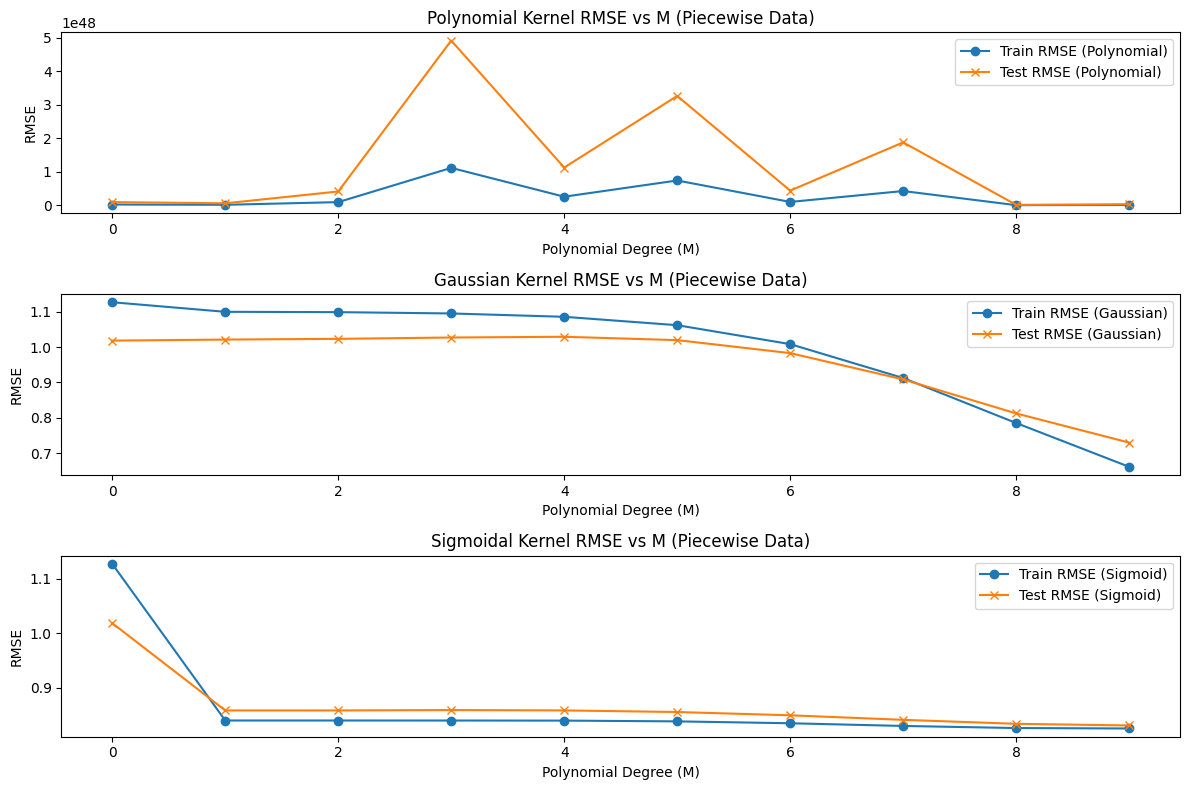

In [81]:
# Generate piecewise target function data
def generate_piecewise_data(n=100):
    x_values = np.random.uniform(0, 3, n)
    noise = np.random.normal(0, np.sqrt(0.1), n)
    t_values = []

    for x in x_values:
        if 0 <= x < 1:
            t_values.append(np.sin(2 * np.pi * x) + np.random.normal(0, 0.1))
        elif 1 <= x < 2:
            t_values.append(2 * np.abs(2 * (x - 1)) - 1 + np.random.normal(0, 0.1))  # Triangle wave
        else:  # 2 <= x < 3
            t_values.append(np.exp(-((x - 2.5)**2) / 0.1) + np.random.normal(0, 0.1))  # Gaussian function

    return x_values, np.array(t_values)


# Iterate through range of M values
M_range = list(range(10))  # Polynomial degrees

# Store errors for different kernels
polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

# Generate data
x_values, t_values = generate_piecewise_data()
x_train, t_train, x_test, t_test = train_test_split(x_values, t_values)

for M in M_range:
    # Fit the model for Polynomial Kernel
    w_poly = KernelRegressionFit1(x_train, t_train, 'polynomial', M, lamda=0.1)
    tr_err_poly, te_err_poly = KernelRegressionPred_Error1(w_poly, x_train, t_train, x_test, t_test, 'polynomial')
    polynomial_tr_error.append(tr_err_poly)
    polynomial_te_error.append(te_err_poly)

    # Fit the model for Gaussian Kernel
    w_gaussian = KernelRegressionFit(x_train, t_train, 'gaussian', M, lamda=0.1)
    tr_err_gaussian, te_err_gaussian = KernelRegressionPred_Error(w_gaussian, x_train, t_train, x_test, t_test, 'gaussian', M)
    gaussian_tr_error.append(tr_err_gaussian)
    gaussian_te_error.append(te_err_gaussian)

    # Fit the model for Sigmoid Kernel
    w_sigmoid = KernelRegressionFit(x_train, t_train, 'sigmoidal', M, lamda=0.1)
    tr_err_sigmoid, te_err_sigmoid = KernelRegressionPred_Error(w_sigmoid, x_train, t_train, x_test, t_test, 'sigmoidal', M)
    sigmoid_tr_error.append(tr_err_sigmoid)
    sigmoid_te_error.append(te_err_sigmoid)

# Plot the training and testing errors for all kernels and model orders M
plt.figure(figsize=(12, 8))

# Polynomial Kernel Errors
plt.subplot(3, 1, 1)
plt.plot(M_range, polynomial_tr_error, label='Train RMSE (Polynomial)', marker='o')
plt.plot(M_range, polynomial_te_error, label='Test RMSE (Polynomial)', marker='x')
plt.title('Polynomial Kernel RMSE vs M (Piecewise Data)')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('RMSE')
plt.legend()

# Gaussian Kernel Errors
plt.subplot(3, 1, 2)
plt.plot(M_range, gaussian_tr_error, label='Train RMSE (Gaussian)', marker='o')
plt.plot(M_range, gaussian_te_error, label='Test RMSE (Gaussian)', marker='x')
plt.title('Gaussian Kernel RMSE vs M (Piecewise Data)')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('RMSE')
plt.legend()

# Sigmoid Kernel Errors
plt.subplot(3, 1, 3)
plt.plot(M_range, sigmoid_tr_error, label='Train RMSE (Sigmoid)', marker='o')
plt.plot(M_range, sigmoid_te_error, label='Test RMSE (Sigmoid)', marker='x')
plt.title('Sigmoidal Kernel RMSE vs M (Piecewise Data)')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


**Observations and Results:**


**Polynomial Kernel:**
The polynomial kernel's ability to fit the data is directly related to the degree
M.
For smooth sections like the sinusoidal part, the polynomial kernel works well. However, for more complex sections (such as the triangle and Gaussian), the polynomial kernel may not handle the sharp transitions and varying patterns well.
Increasing
M too much leads to overfitting, especially on the triangle and Gaussian parts.

**Gaussian Kernel (RBF Kernel):**
The Gaussian kernel adapts better to the smooth sinusoidal section and is more robust to changes in data.
It performs reasonably well for the triangle and Gaussian waveforms as it can better capture the local structure of the data compared to the polynomial kernel.
The Gaussian kernel shows good generalization.

**Sigmoidal Kernel:**
The sigmoidal kernel struggles with data that involves rapid transitions like the triangle wave and Gaussian function, as it tends to saturate quickly.
While it can fit the sinusoidal part well, its non-linearity limits its ability to handle more complex or piecewise data patterns effectively.

**Conclusion:**
* For smooth functions (like sinusoids), all kernels perform well, with the polynomial kernel being the most flexible at higher degrees.
* For more complex data (triangle and Gaussian), the Gaussian kernel tends to perform best overall due to its flexibility in capturing local structures.
* The sigmoidal kernel is the least effective for piecewise data because of its limited ability to adapt to sharp transitions.
* The training and test errors reveal the balance between overfitting (with higher
M or kernel flexibility) and underfitting (with lower
M or more regularization).

<b> Report your observations </b>

1. **Polynomial Kernel:** The polynomial kernel works well for smoother functions like the sine wave. It can overfit when the degree of the polynomial is high.
2. **Gaussian (RBF) Kernel:** The Gaussian kernel adapts well to smooth variations in data but may not perform well on very complex or piecewise functions.
3. **Sigmoidal Kernel:** The sigmoidal kernel might not perform as well, especially on functions with smooth or highly variable parts, as the sigmoid function tends to saturate and lose gradient information for large inputs.




# <b> Part - (4) : Understanding online training  </b>

(a) Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.



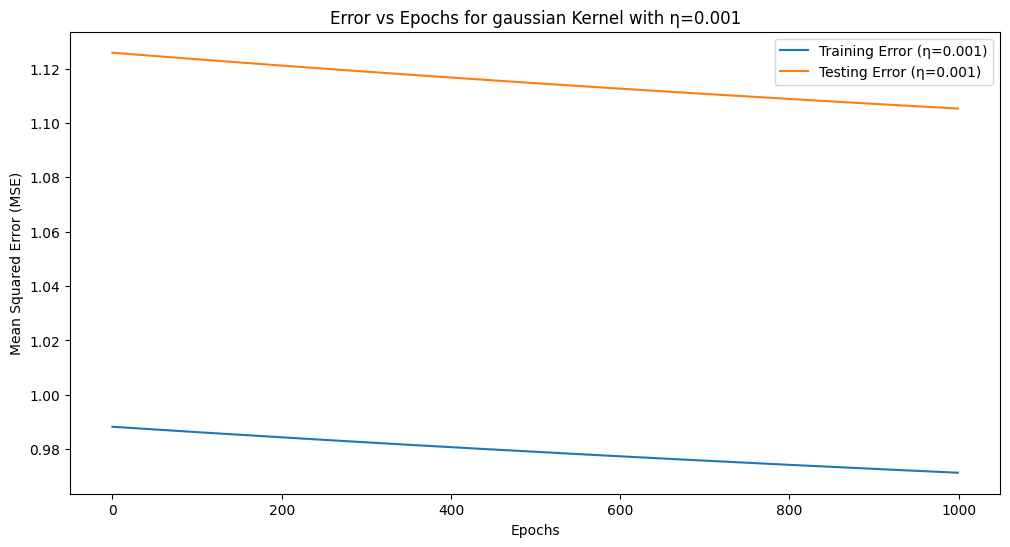

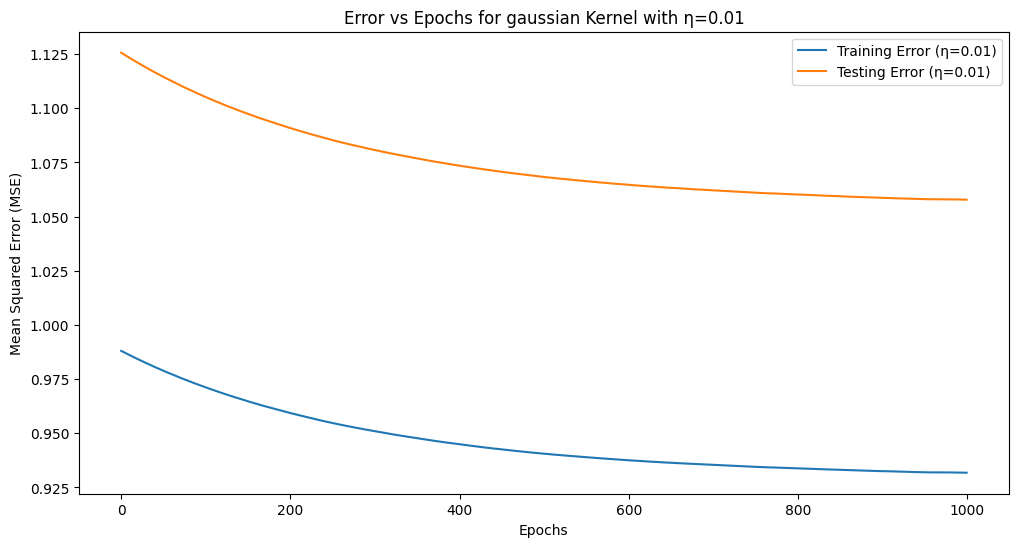

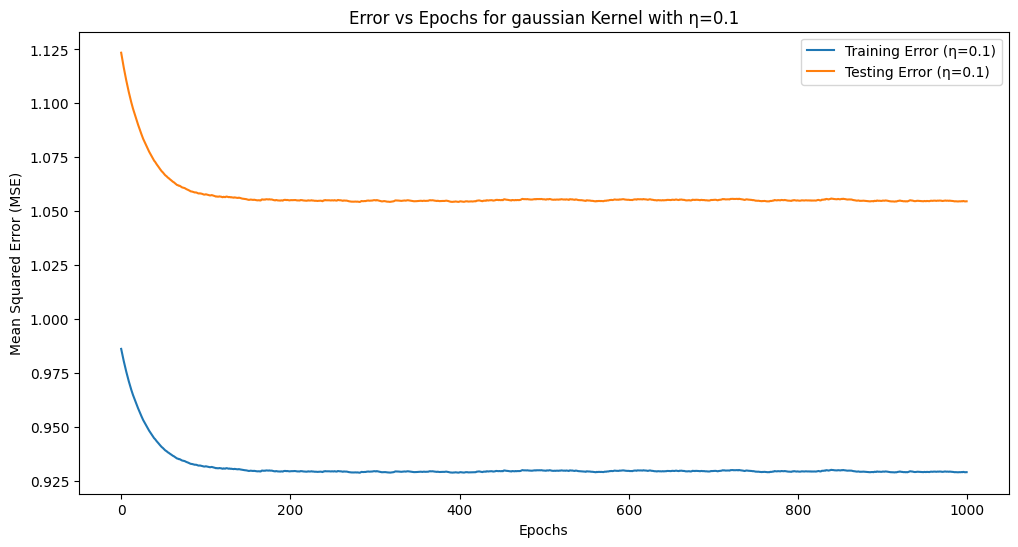

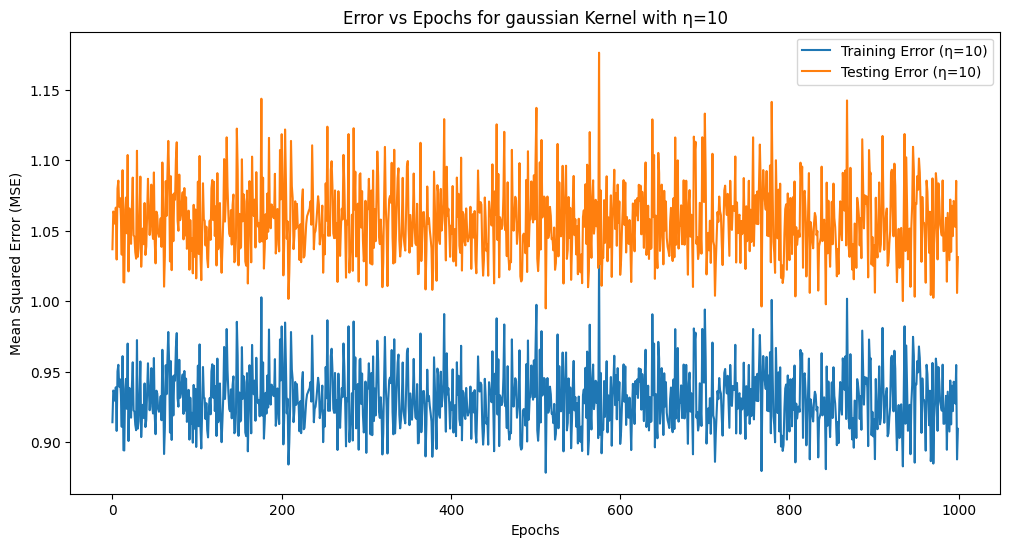

In [89]:
# Kernel functions
def compute_kernel(X, X_prime, kernelType, M=1):
    if kernelType == 'polynomial':
        # Reshaping X and X_prime to ensure they are 2D arrays
        X = X.reshape(-1, 1)  # Reshape X to (BatchSize, 1)
        X_prime = X_prime.reshape(-1, 1)  # Reshape X_prime to (N, 1)
        return (np.dot(X, X_prime.T) + np.ones((X.shape[0], X_prime.shape[0]))) ** M
    elif kernelType == 'gaussian':
        gamma = 0.05
        # Updated to calculate pairwise distances between all points in X and X_prime
        diff = X[:, np.newaxis] - X_prime #changed to calculate pairwise distance
        return np.exp(-gamma * np.sum(diff ** 2, axis=-1))
    elif kernelType == 'sigmoidal':
        # Reshaping X and X_prime to ensure they are 2D arrays
        X = X.reshape(-1, 1)  # Reshape X to (BatchSize, 1)
        X_prime = X_prime.reshape(-1, 1)  # Reshape X_prime to (N, 1)
        alpha = 1.0
        coef0 = np.zeros((X.shape[0], X_prime.shape[0]))  # Match dimensions
        return np.tanh(np.dot(X, X_prime.T) * alpha + coef0)
# Error Prediction function to calculate training and test errors
def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    K_train = compute_kernel(X_train, X_train, kernelType)
    K_test = compute_kernel(X_test, X_train, kernelType)

    # Calculate predictions
    # Changed to make the predictions based on the whole training set size instead of BatchSize
    Y_train_pred = np.dot(K_train, w_est[:len(X_train)])
    Y_test_pred = np.dot(K_test, w_est[:len(X_train)])

    # Calculate training and testing errors (MSE)
    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)

    return TrainError, TestError

# Online Training function for SGD
def OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize):
    N = len(X_train)
    # Initialize weights to be of size of the training set
    weights = np.zeros(N)

    train_errors, test_errors = [], []  # To store errors for plotting

    # Iterate through epochs
    for epoch in range(Epochs):
        # Shuffle the data at the start of each epoch
        indices = np.random.permutation(N)
        X_train_shuffled = X_train[indices]
        Y_train_shuffled = Y_train[indices]

        # For each batch
        for i in range(0, N, BatchSize):
            # Create mini-batch
            batch_X = X_train_shuffled[i:i + BatchSize]
            batch_Y = Y_train_shuffled[i:i + BatchSize]

            # Compute kernel matrix for the batch
            K_batch = compute_kernel(batch_X, X_train, kernelType, M)

            # Compute the prediction error
            Y_pred_batch = K_batch @ weights[:len(batch_X)]
            error = batch_Y - Y_pred_batch

            # Gradient of the loss function w.r.t. the weights (negative gradient of MSE)
            gradient = -2 * K_batch.T @ error / BatchSize

            # Update the weights using the gradient and step size (SGD update)
            weights[:len(batch_X)] -= stepSize * gradient

        # Compute training and testing errors after each epoch
        tr_err, te_err = ErrorPred(weights, X_train, Y_train, X_test, Y_test, kernelType)
        train_errors.append(tr_err)
        test_errors.append(te_err)

    # Return the final weights and the errors for plotting
    return weights, train_errors, test_errors

# Generate synthetic data (Piecewise function)
def generate_data():
    X = np.linspace(0, 3, 100)
    Y = np.zeros_like(X)

    for i, x in enumerate(X):
        if 0 <= x < 1:
            Y[i] = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1)
        elif 1 <= x < 2:
            Y[i] = 2 * abs(2 * (x - 1)) - 1 + np.random.normal(0, 0.1)
        else:
            Y[i] = np.exp(-((x - 2.5)**2) / 0.1) + np.random.normal(0, 0.1)

    return X, Y

# Split the data into training and testing sets
X, Y = generate_data()
X_train, Y_train = X[::2], Y[::2]  # Even-indexed points for training
X_test, Y_test = X[1::2], Y[1::2]  # Odd-indexed points for testing

# Parameters for training
kernelType = 'gaussian'
Epochs = 1000
BatchSize = 10  # Size of mini-batch
stepSizes = [0.001, 0.01, 0.1, 10]  # Different step sizes to test
M = 3  # Degree of polynomial kernel (only for polynomial)

# Results for different step sizes
for stepSize in stepSizes:
    # Run Online Training
    weights, train_errors, test_errors = OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize)

    # Plot training and testing errors for different step sizes
    plt.figure(figsize=(12, 6))
    plt.plot(range(Epochs), train_errors, label=f'Training Error (η={stepSize})')
    plt.plot(range(Epochs), test_errors, label=f'Testing Error (η={stepSize})')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(f'Error vs Epochs for {kernelType} Kernel with η={stepSize}')
    plt.legend()
    plt.show()


(b) Study the effect of batch size on the speed of convergence

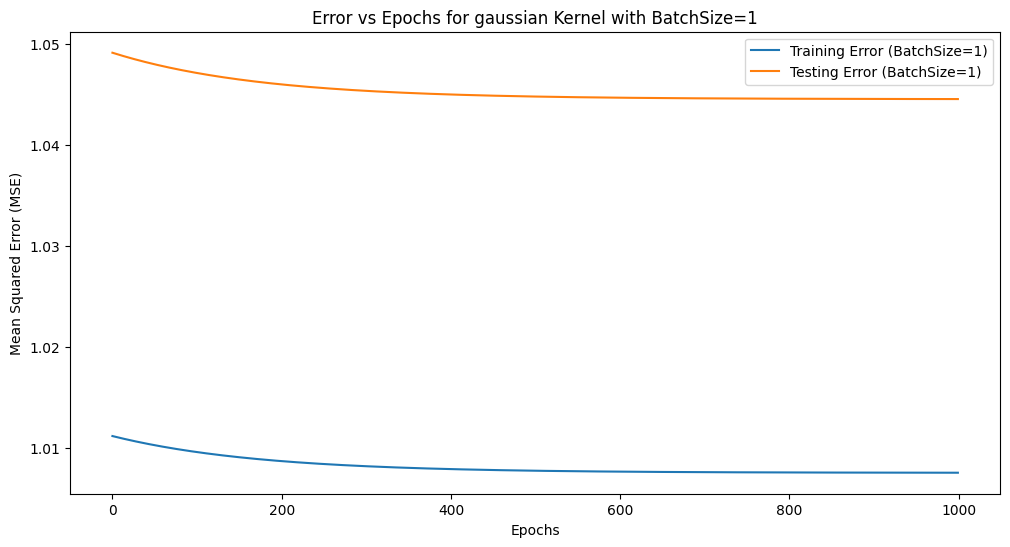

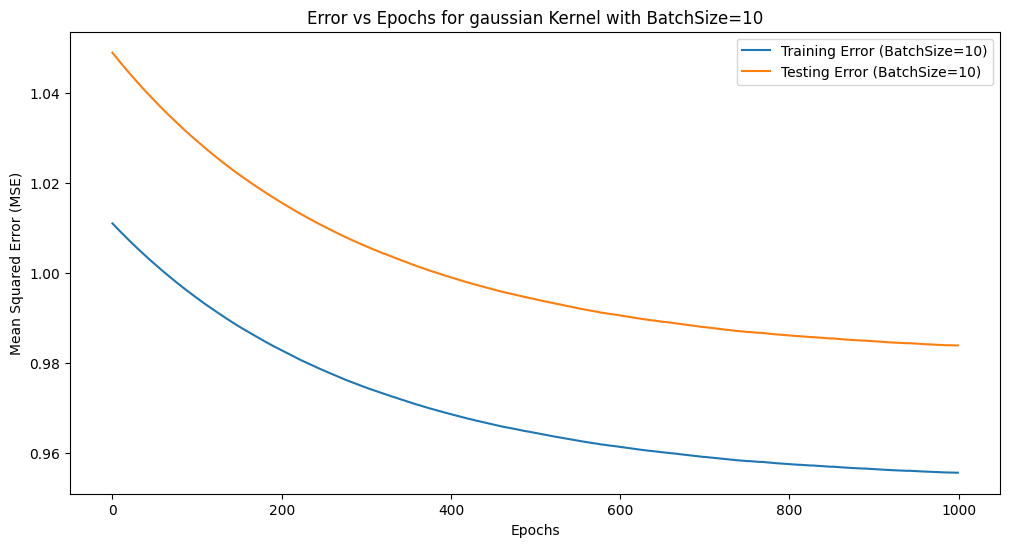

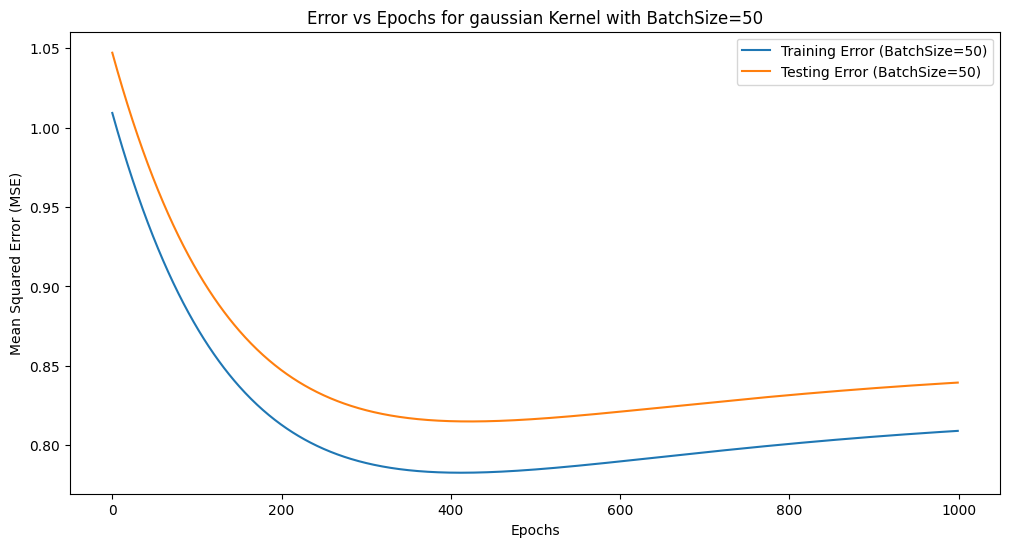

In [85]:
# Experiment with different batch sizes
batch_sizes = [1, 10, 50]  # Different batch sizes to test

for BatchSize in batch_sizes:
    # Run Online Training
    weights, train_errors, test_errors = OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize=0.01)

    # Plot training and testing errors for different batch sizes
    plt.figure(figsize=(12, 6))
    plt.plot(range(Epochs), train_errors, label=f'Training Error (BatchSize={BatchSize})')
    plt.plot(range(Epochs), test_errors, label=f'Testing Error (BatchSize={BatchSize})')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(f'Error vs Epochs for {kernelType} Kernel with BatchSize={BatchSize}')
    plt.legend()
    plt.show()


<b> Report your observations </b>

1. **Step Size**: Small
𝜂 leads to slow convergence, while large
𝜂 risks overshooting and instability. Here 𝜂 = 0.1 is safe as we converge to a solution in the given number of iterations.

2. We approximately reach the solution which is found by the psuedo inverse solution.

3. **Batch Size**: For larger Batch size rate of convergence is higher.



# <b> Part - (5) : Understanding bias-variance trade-off  </b>

a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.

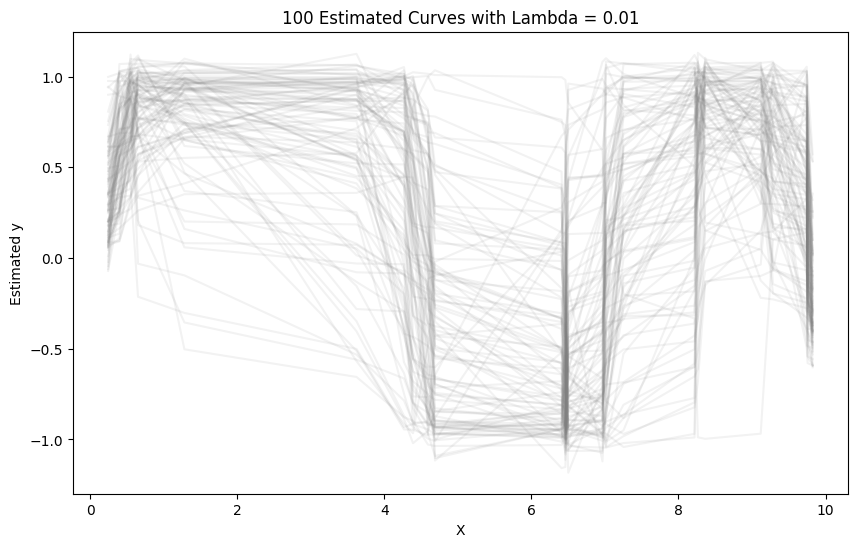

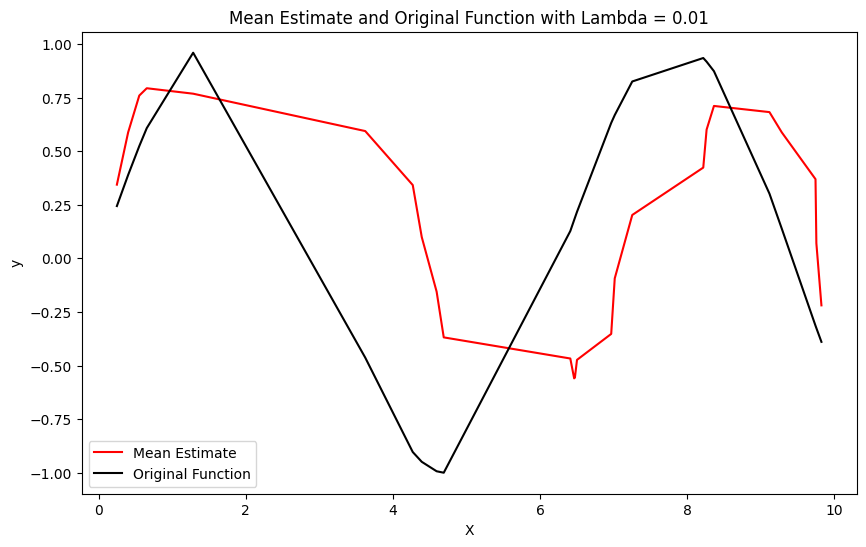

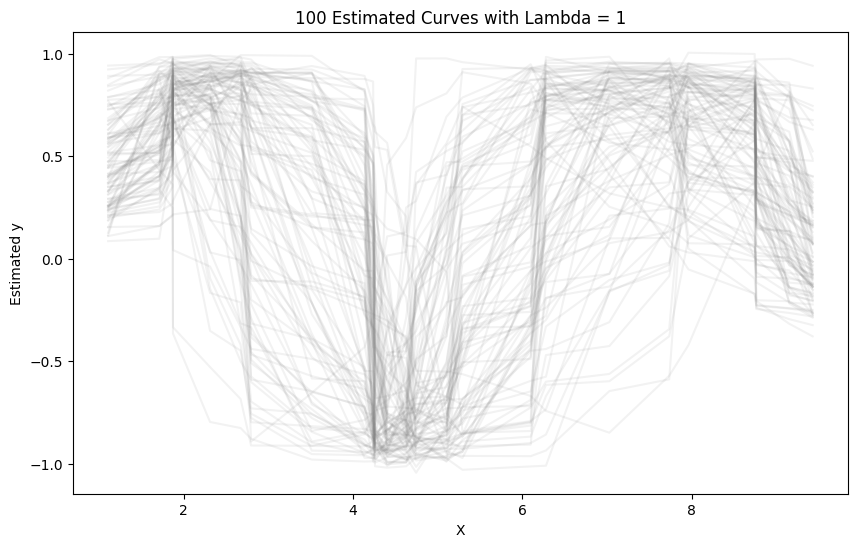

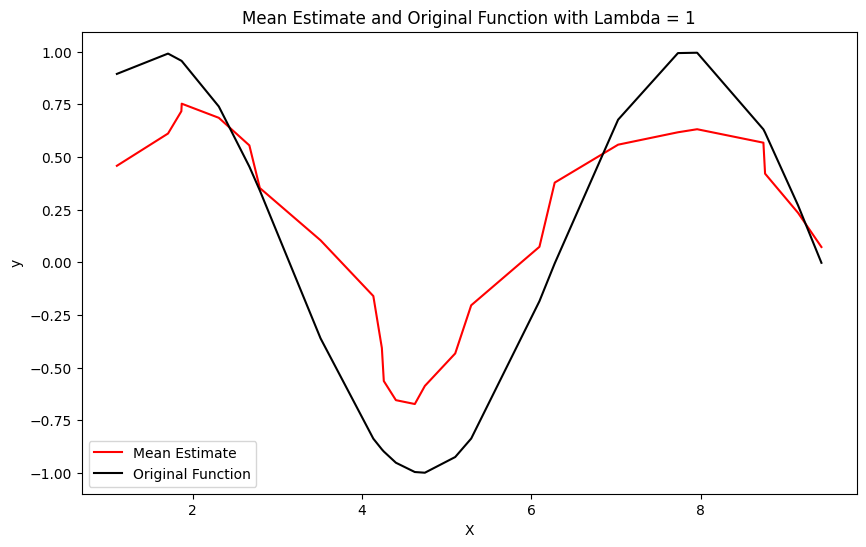

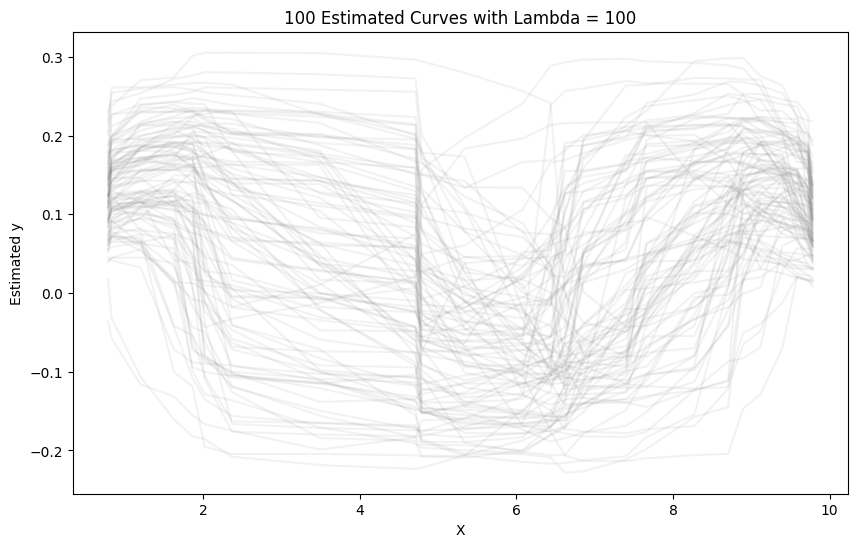

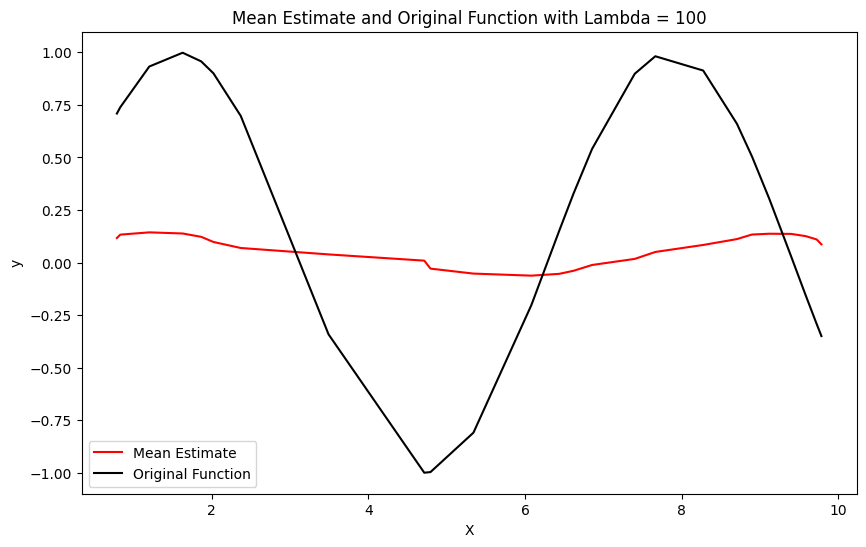

In [90]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sinusoidal data with noise
def generate_sinusoidal_data(N=25):
    X = np.sort(np.random.rand(N) * 10)  # X points between 0 and 10
    y = np.sin(X) + np.random.normal(0, 0.1, size=N)  # Sine wave with noise
    return X, y

# Gaussian basis functions including bias term
def gaussian_basis_functions(X, centers, sigma):
    # Basis functions for each Gaussian + bias term (1 for each data point)
    Phi = np.exp(-np.square(X[:, np.newaxis] - centers) / (2 * sigma**2))
    # Add bias term (column of ones)
    Phi = np.hstack([np.ones((X.shape[0], 1)), Phi])  # 1's column added for the bias term
    return Phi

# Regularized Least Squares (including the bias term)
def regularized_least_squares(X, y, M, lambda_reg):
    # Generate Gaussian basis functions with equally spaced centers
    centers = np.linspace(min(X), max(X), M)
    Phi = gaussian_basis_functions(X, centers, sigma=1)

    # Regularized least squares solution
    I = np.identity(M + 1)  # Include bias parameter in the regularization matrix
    w = np.linalg.inv(Phi.T @ Phi + lambda_reg * I) @ Phi.T @ y
    return w, Phi

# Plotting function for displaying 100 estimated curves
def plot_estimated_curves(all_estimates, X, lambda_reg):
    plt.figure(figsize=(10, 6))

    # Plot all estimated curves in light gray
    for estimate in all_estimates:
        plt.plot(X, estimate, color='gray', alpha=0.1)

    plt.title(f"100 Estimated Curves with Lambda = {lambda_reg}")
    plt.xlabel('X')
    plt.ylabel('Estimated y')
    plt.show()

# Plotting function to display the mean curve and the original function
def plot_mean_estimate(all_estimates, X, lambda_reg):
    plt.figure(figsize=(10, 6))

    # Compute the mean estimate
    mean_estimate = np.mean(all_estimates, axis=0)

    # Plot the mean estimate in red
    plt.plot(X, mean_estimate, color='red', label='Mean Estimate')

    # Plot the original function in black
    plt.plot(X, np.sin(X), color='black', label='Original Function')

    plt.title(f"Mean Estimate and Original Function with Lambda = {lambda_reg}")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Experiment with different lambda values
def run_experiment():
    M = 25  # 25th order linear model (24 Gaussian basis functions + 1 bias)
    L = 100  # Number of datasets
    N = 25   # Number of datapoints in each dataset
    lambda_values = [0.01, 1, 100]  # Different regularization parameters

    for lambda_reg in lambda_values:
        all_estimates = []

        # Generate 100 datasets and fit the model
        for _ in range(L):
            X, y = generate_sinusoidal_data(N)
            w, Phi = regularized_least_squares(X, y, M, lambda_reg)
            y_est = Phi @ w
            all_estimates.append(y_est)

        # Plot the results for this lambda value
        plot_estimated_curves(np.array(all_estimates), X, lambda_reg)
        plot_mean_estimate(np.array(all_estimates), X, lambda_reg)

run_experiment()


<b> Report your observations </b>

1. **Low Regularization** (𝜆
= 0.01 ) :
  * The estimated curves show high variance
  * The mean value of the mean
estimate approximately matches the mean value of the original function noisy data.

  * The mean curve tracks the sine function, but there is significant variability.

  * Hence we can conclude that the Bias is Low, Variance is High.

2. **Medium Regularization** (
𝜆
=
1 ) :

  * The estimated curves show moderate variance.
  * The mean curve closely follows the original sine function.
  * Hence we can conclude that the Bias is Moderate, Variance is Moderate.

3. **High Regularization**( 𝜆
=
100
) :
  * The estimated curves show low variance and hence are very similar.
  * The mean curve follows almost a constant value and is overly smooth.
  * Hence we can conclude that the Bias is High, Variance is Low.



# Part - (6) : Understanding Maximum a Posteriori (MAP) estimate

(a). Generate 100 noisy data points of a sinusoid. Fit a  20th  order linear regression model with Gaussian basis functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

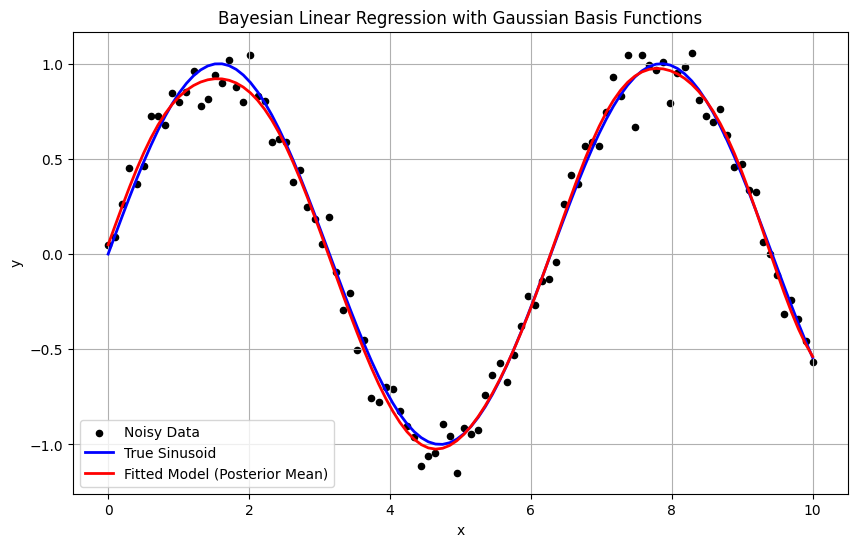

In [91]:
# Step 1: Generate 100 noisy data points of a sinusoid
np.random.seed(42)  # For reproducibility
n_points = 100  # Number of data points
x = np.linspace(0, 10, n_points)
y_true = np.sin(x)  # True sinusoidal values
noise = np.random.normal(0, 0.1, n_points)  # Gaussian noise
y = y_true + noise  # Noisy observations

# Step 2: Define Gaussian basis functions
def gaussian_basis(x, centers, width):
    """
    Gaussian basis function.
    x: Input data points.
    centers: Centers of the Gaussian functions.
    width: Width (sigma) of the Gaussian functions.
    """
    return np.exp(-0.5 * ((x[:, np.newaxis] - centers) ** 2) / width ** 2)

# Define parameters for the Gaussian basis functions
n_basis_functions = 20
centers = np.linspace(0, 10, n_basis_functions)  # Equally spaced centers
width = 1.0  # Standard deviation of the Gaussian functions

# Step 3: Construct the design matrix (phi matrix) using Gaussian basis functions
Phi = gaussian_basis(x, centers, width)

# Step 4: Define the prior and initialize the parameters for Bayesian update
alpha = 1e-2  # Precision of the prior
beta = 1 / (0.1 ** 2)  # Precision of the likelihood

# Initialize prior mean (w_0) and covariance (S_0)
w_0 = np.zeros(n_basis_functions)  # Prior mean (zero mean)
S_0 = (alpha * np.eye(n_basis_functions))  # Prior covariance

# Step 5: Perform Bayesian Sequential Updates
def bayesian_update(Phi, y, w_0, S_0, alpha, beta):
    """
    Perform Bayesian sequential updates to obtain the posterior distribution
    of the parameters w (mean and covariance).
    """
    # Update the covariance
    S_n = np.linalg.inv(alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi))

    # Update the mean
    w_n = beta * S_n.dot(Phi.T.dot(y))

    return w_n, S_n

# Perform Bayesian updates
w_n, S_n = bayesian_update(Phi, y, w_0, S_0, alpha, beta)

# Step 6: Plot the results
# Generate the model's prediction based on the posterior mean
y_pred = Phi.dot(w_n)

# Plot the noisy data and the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Noisy Data', s=20)
plt.plot(x, y_true, color='blue', label='True Sinusoid', linewidth=2)
plt.plot(x, y_pred, color='red', label='Fitted Model (Posterior Mean)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Linear Regression with Gaussian Basis Functions')
plt.legend()
plt.grid(True)
plt.show()


(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

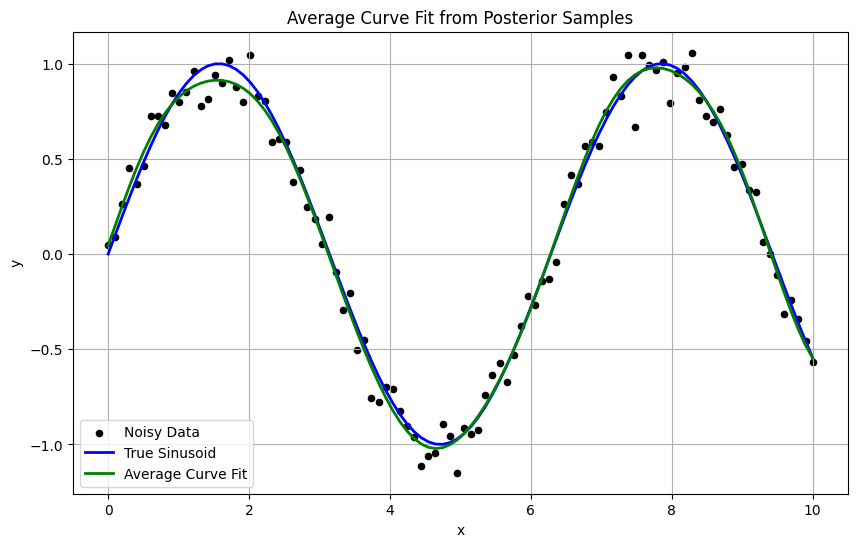

In [92]:
# Step 1: Sample from the posterior distribution and estimate curve fits
n_samples = 100  # Number of samples to generate

y_fits = []
for _ in range(n_samples):
    # Sample weights from the posterior distribution
    w_sample = np.random.multivariate_normal(w_n, S_n)

    # Estimate the curve using the sampled weights
    y_fit = Phi.dot(w_sample)
    y_fits.append(y_fit)

# Step 2: Calculate the average of the curve fits
y_avg_fit = np.mean(y_fits, axis=0)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Noisy Data', s=20)
plt.plot(x, y_true, color='blue', label='True Sinusoid', linewidth=2)
plt.plot(x, y_avg_fit, color='green', label='Average Curve Fit', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Average Curve Fit from Posterior Samples')
plt.legend()
plt.grid(True)
plt.show()


(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

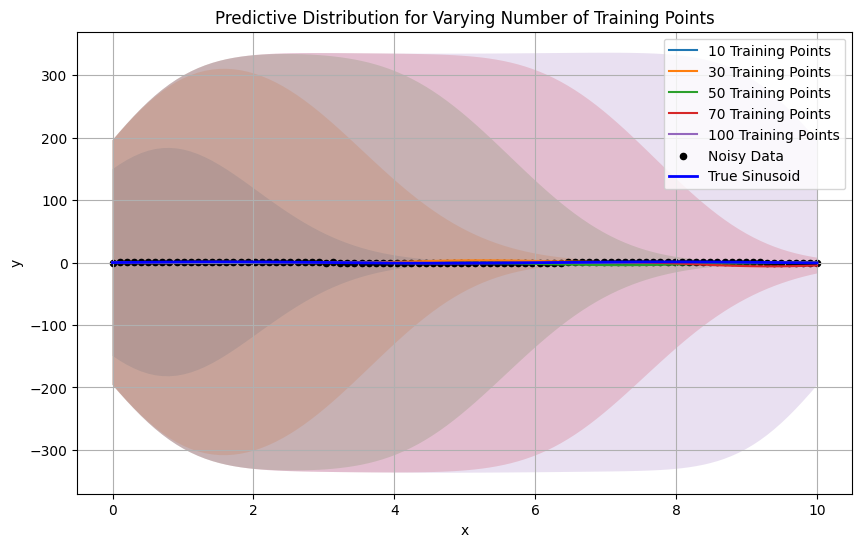

In [93]:
# Step 1: Predictive distribution for different numbers of training data points
def predictive_distribution(Phi_new, Phi_train, w_n, S_n, beta):
    # Predictive mean
    predictive_mean = Phi_new.dot(w_n)

    # Predictive covariance (diagonal of the full covariance matrix)
    S_0_inv = np.linalg.inv(S_n)
    predictive_cov = (1 / beta) + np.diag(Phi_new.dot(S_0_inv).dot(Phi_new.T))

    return predictive_mean, predictive_cov

# Varying the number of training data points
training_sizes = [10, 30, 50, 70, 100]  # Different training sizes
plt.figure(figsize=(10, 6))

for size in training_sizes:
    x_train = x[:size]
    y_train = y[:size]

    # Rebuild Phi for the current training set
    Phi_train = gaussian_basis(x_train, centers, width)

    # Update posterior based on the current training data
    w_n, S_n = bayesian_update(Phi_train, y_train, w_0, S_0, alpha, beta)

    # Predictive distribution for new data points
    x_new = np.linspace(0, 10, 100)
    Phi_new = gaussian_basis(x_new, centers, width)
    pred_mean, pred_cov = predictive_distribution(Phi_new, Phi_train, w_n, S_n, beta)

    # Plot predictive mean and variance (confidence intervals)
    plt.plot(x_new, pred_mean, label=f'{size} Training Points')

    # We use the diagonal of the covariance matrix for variance
    plt.fill_between(x_new, pred_mean - 2 * np.sqrt(pred_cov), pred_mean + 2 * np.sqrt(pred_cov), alpha=0.2)

plt.scatter(x, y, color='black', label='Noisy Data', s=20)
plt.plot(x, y_true, color='blue', label='True Sinusoid', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictive Distribution for Varying Number of Training Points')
plt.legend()
plt.grid(True)
plt.show()


<b> Report your observations </b>

Here are some observations from the above analysis:

- **Effect of Number of Training Data Points:**
  - As the number of training points increases, the predictive distribution tightens around the true sinusoid.
  - With more data, the variance (uncertainty) in predictions decreases, leading to more confidence in the model.
  - Fewer training points result in wider confidence intervals, indicating higher uncertainty.

- **Posterior Mean vs. True Sinusoid:**
  - The posterior mean fit gets closer to the true sinusoid as more data is used.
  - Noise can cause deviations, especially with smaller datasets.
  - Averaging multiple posterior samples provides a smoother and more accurate estimate of the true function.

- **Uncertainty in Predictions:**
  - Fewer data points lead to higher uncertainty, reflected in wider confidence intervals.
  - More data leads to more precise weight estimates, reducing predictive variance and narrowing confidence intervals.

- **Sampling from Posterior:**
  - Sampling multiple posterior weight vectors reveals the uncertainty in the model.
  - Averaging these fits provides a clearer estimate of the true function, and accuracy improves with more samples.

- **Predictive Distribution Analysis:**
  - As more data is included, the predictive distribution becomes more centered and narrower, indicating increased confidence in predictions.
  - With fewer data points, the uncertainty is higher, and predictions are more spread out.

---

### Conclusion:

- **More Data = Less Uncertainty:** Increasing data points leads to more confident predictions and less uncertainty in the model.
- **Posterior Distribution:** Sampling from the posterior gives insights into model variability, highlighting how predictions change with different parameter values.
- **Uncertainty Representation:** Bayesian methods naturally quantify uncertainty, with predictions becoming more precise as data increases.